In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

### Q1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [3]:
cub_df = pd.read_csv('cubic_zirconia.csv')

In [4]:
cub_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
cub_df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [6]:
cub_df.drop('Unnamed: 0', axis=1,inplace=True)

In [7]:
cub_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [8]:
cub_df.shape

(26967, 10)

In [9]:
cub_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [10]:
cub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [11]:
dups = cub_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print('Before',cub_df.shape)

cub_df.drop_duplicates(inplace=True) 
print('After',cub_df.shape)

Number of duplicate rows = 34
Before (26967, 10)
After (26933, 10)


In [12]:
cub_df.duplicated().sum()

0

In [13]:
numeric_colmns = list(cub_df.select_dtypes(include=np.number).columns)
numeric_colmns

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

In [14]:
obj_colmns = [x for x in cub_df.columns if x not in numeric_colmns]
obj_colmns

['cut', 'color', 'clarity']

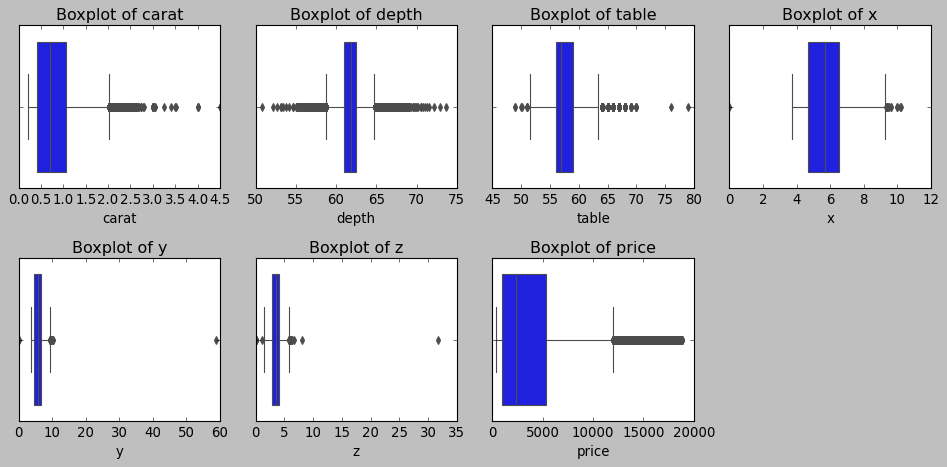

In [15]:
plt.figure(figsize = (12,6))
for i in range(len(numeric_colmns)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x = cub_df[numeric_colmns[i]], data = cub_df);
    plt.title('Boxplot of {}'.format(numeric_colmns[i]))
    plt.tight_layout();

#### Univariate Analysis

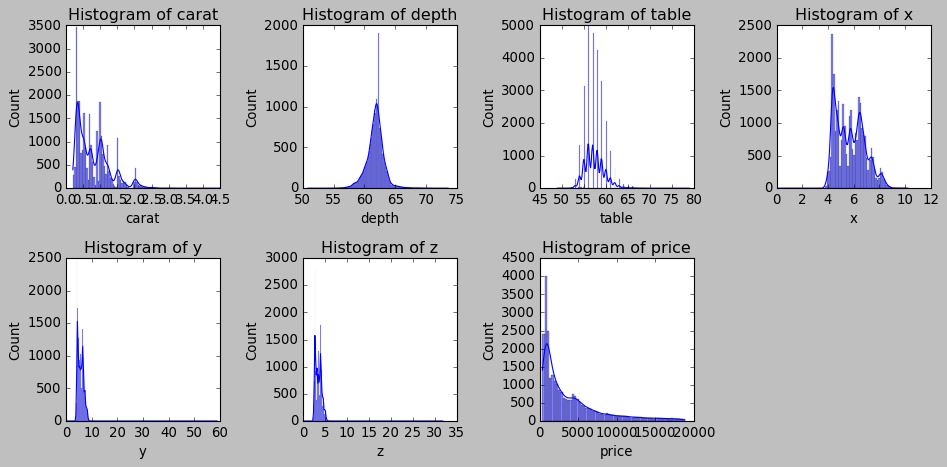

In [16]:
plt.figure(figsize = (12,6))
for i in range(len(numeric_colmns)):
    plt.subplot(2, 4, i + 1)
    sns.histplot(x = cub_df[numeric_colmns[i]], data = cub_df, kde=True);
    plt.title('Histogram of {}'.format(numeric_colmns[i]))
    plt.tight_layout();

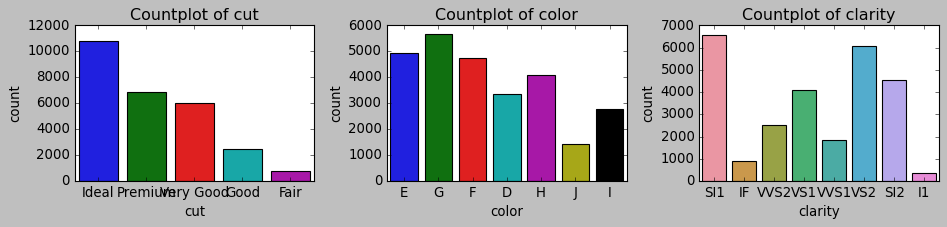

In [17]:
plt.figure(figsize = (12,3))
for i in range(len(obj_colmns)):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x = cub_df[obj_colmns[i]], data = cub_df)
    plt.title('Countplot of {}'.format(obj_colmns[i]))
    plt.tight_layout()

#### Bivariate Analysis

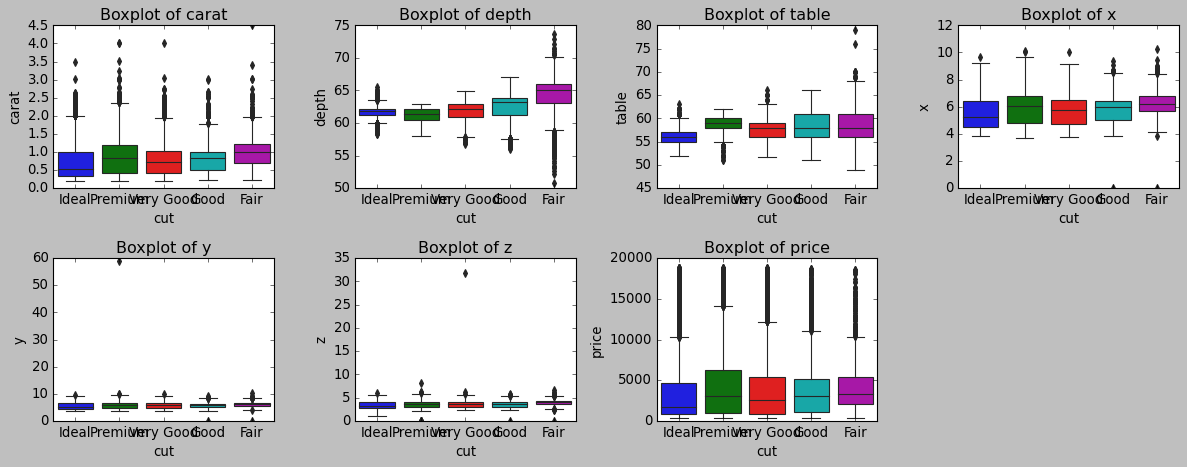

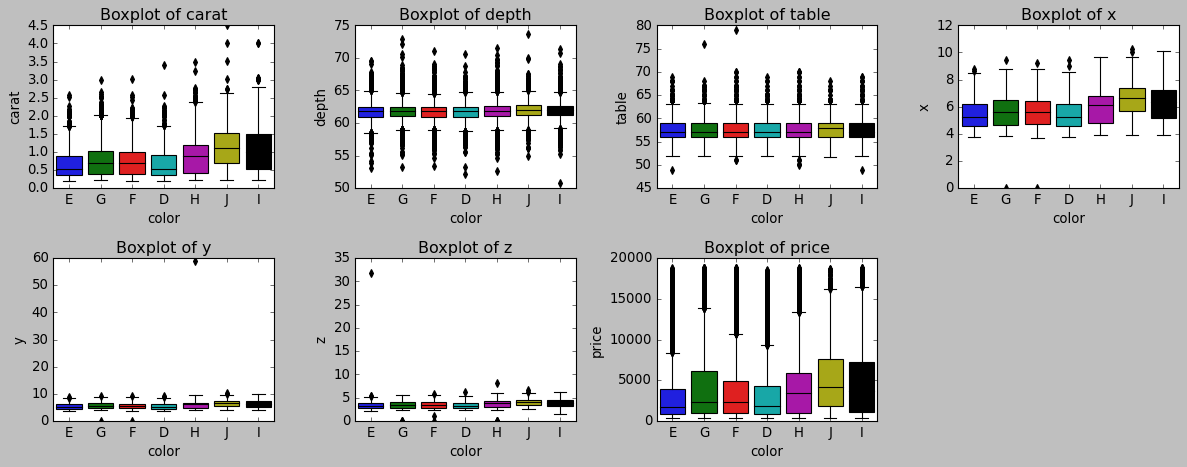

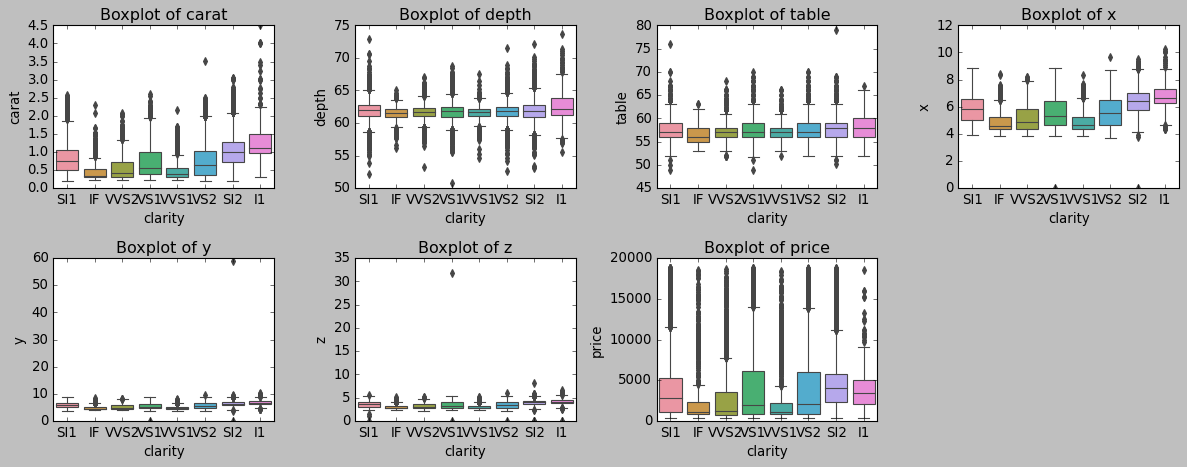

In [18]:
for o_col in obj_colmns:

    plt.figure(figsize = (15,6))
    for i in range(len(numeric_colmns)):
        plt.subplot(2, 4, i + 1)
        sns.boxplot(y = cub_df[numeric_colmns[i]], data = cub_df, x = o_col);
        plt.title('Boxplot of {}'.format(numeric_colmns[i]))
        plt.tight_layout();
        

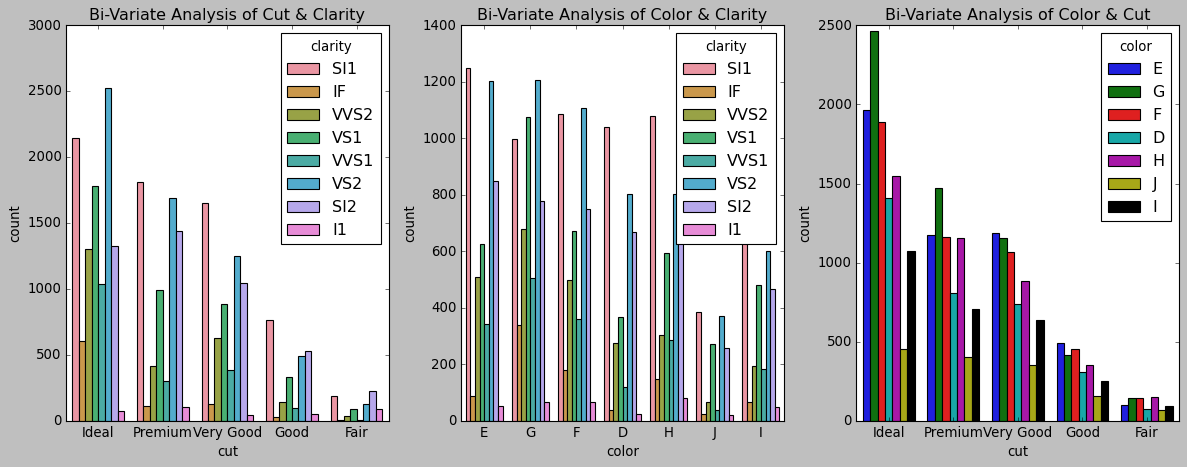

In [19]:
plt.figure(figsize = (15,6))
plt.subplot(1, 3, 1)
sns.countplot(data = cub_df, x = cub_df['cut'], hue='clarity')
plt.title('Bi-Variate Analysis of Cut & Clarity')
plt.subplot(1, 3, 2)
sns.countplot(data = cub_df, x = cub_df['color'], hue='clarity')
plt.title('Bi-Variate Analysis of Color & Clarity')
plt.subplot(1, 3, 3)
sns.countplot(data = cub_df, x = cub_df['cut'], hue='color')
plt.title('Bi-Variate Analysis of Color & Cut')
plt.tight_layout();

#### Multivariate Analysis

<Figure size 560x560 with 0 Axes>

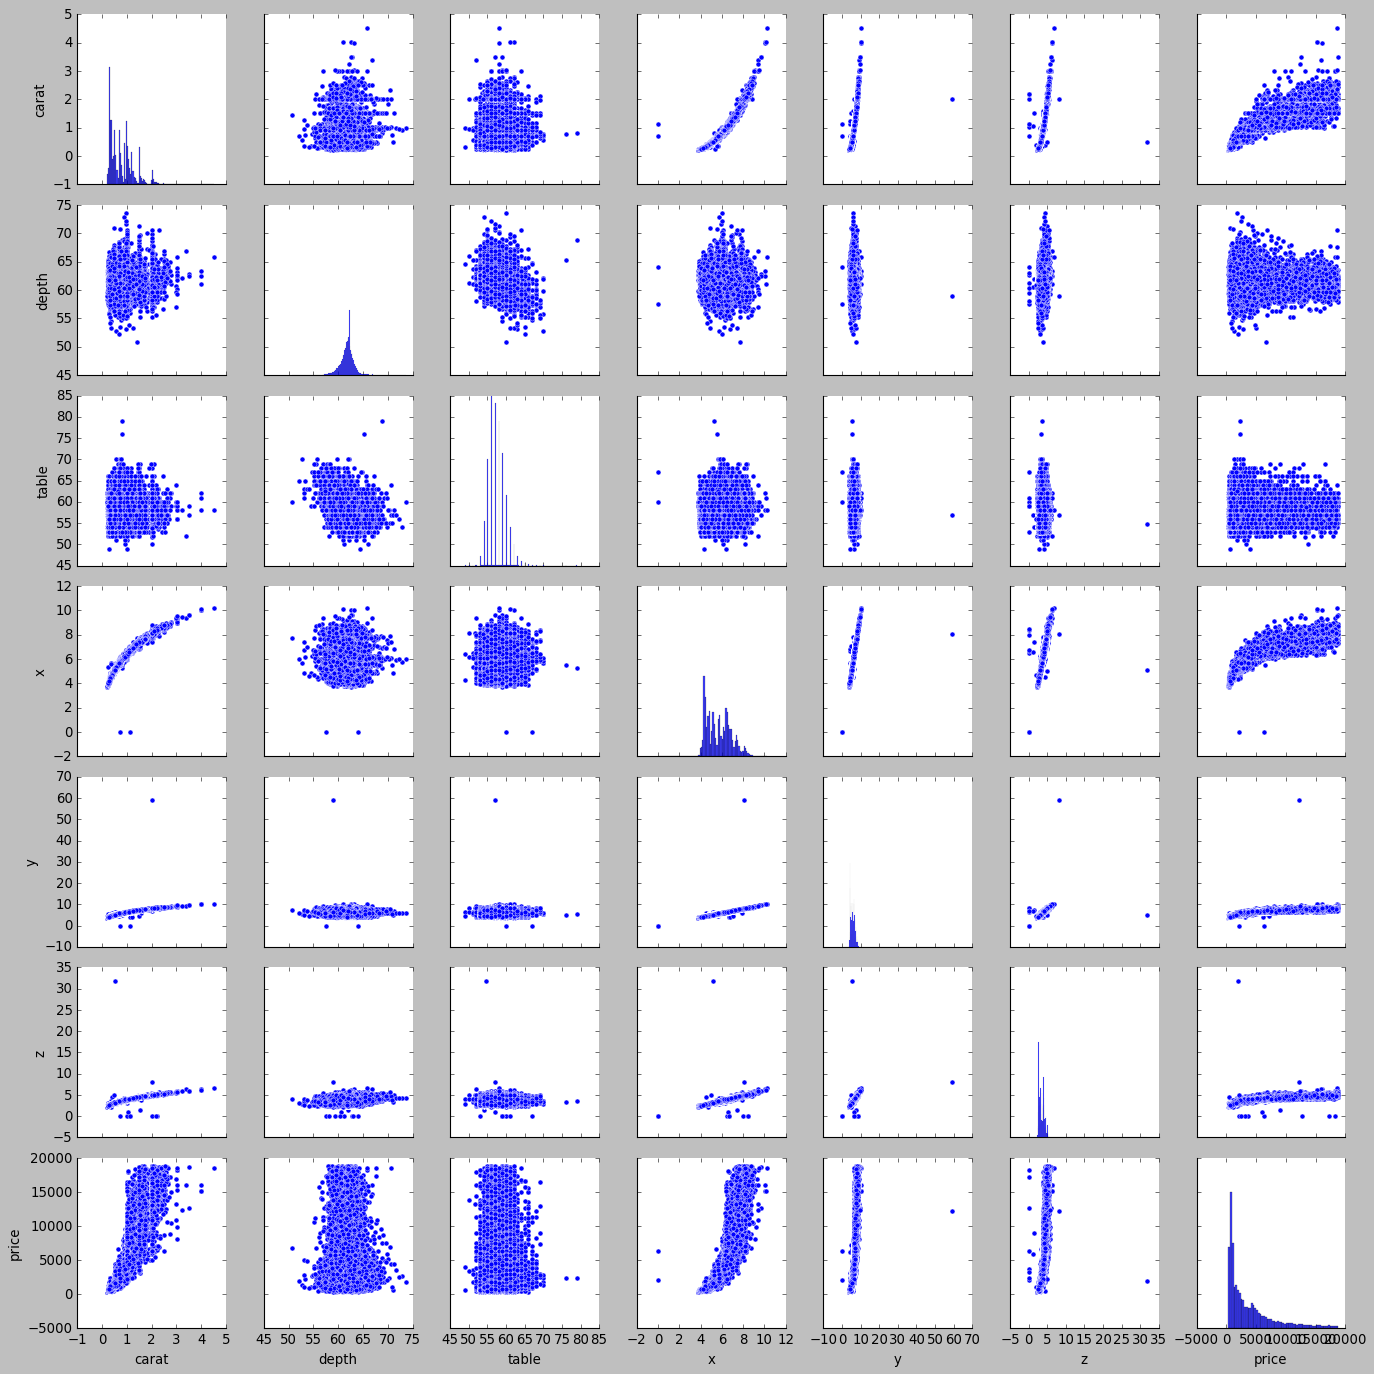

In [20]:
plt.figure(figsize = (7,7))
sns.pairplot(data=cub_df)

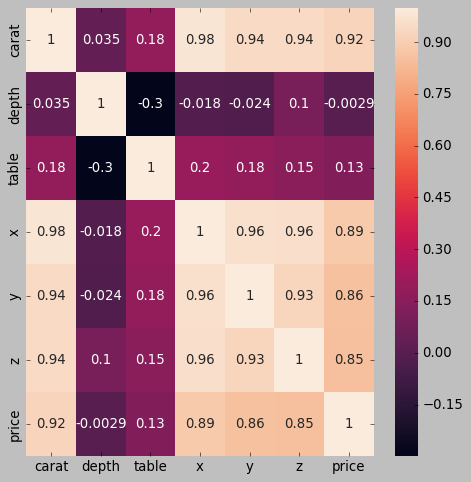

In [21]:
cor = cub_df.corr()
plt.figure(figsize=(7, 7))
sns.heatmap(cor,annot = True);

In [22]:
cub_df.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.745285,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,1.412243,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


### Q1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [23]:
cub_df.mean()

carat       0.798010
depth      61.745285
table      57.455950
x           5.729346
y           5.733102
z           3.537769
price    3937.526120
dtype: float64

In [24]:
cub_df = cub_df.fillna(cub_df.mean()) 

In [25]:
cub_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [26]:
len(cub_df[cub_df.x == 0])

2

In [27]:
len(cub_df[cub_df.y == 0])

2

In [28]:
len(cub_df[cub_df.z == 0])

8

In [29]:
cub_df.shape

(26933, 10)

In [30]:
df = cub_df[~((cub_df['x']==0)|(cub_df['y']==0)|(cub_df['z']==0))]

In [31]:
df.shape

(26925, 10)

In [32]:
df[['price', 'cut']].groupby(['cut']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='Wistia')

In [33]:
df[['price', 'color']].groupby(['color']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='Wistia')

In [34]:
df[['price', 'clarity']].groupby(['clarity']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='Wistia')

### Q 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning. 

In [35]:
print('cut\n',df.cut.value_counts())
print('\n')
print('color\n',df.color.value_counts())
print('\n')
print('clarity\n',df.clarity.value_counts())
print('\n')

cut
 Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64


color
 G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
 SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64




In [36]:

df['cut']=np.where(df['cut'] =='Premium', '4', df['cut'])
df['cut']=np.where(df['cut'] =='Very Good', '3', df['cut'])
df['cut']=np.where(df['cut'] =='Ideal', '2', df['cut'])
df['cut']=np.where(df['cut'] =='Good', '1', df['cut'])
df['cut']=np.where(df['cut'] =='Fair', '0', df['cut'])

In [37]:
df['color']=np.where(df['color'] =='D', '6', df['color'])
df['color']=np.where(df['color'] =='E', '5', df['color'])
df['color']=np.where(df['color'] =='F', '4', df['color'])
df['color']=np.where(df['color'] =='G', '3', df['color'])
df['color']=np.where(df['color'] =='H', '2', df['color'])
df['color']=np.where(df['color'] =='I', '1', df['color'])
df['color']=np.where(df['color'] =='J', '0', df['color'])

In [38]:
df['clarity']=np.where(df['clarity'] =='IF', '7', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS1', '6', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS2', '5', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS1', '4', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS2', '3', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI1', '2', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI2', '1', df['clarity'])
df['clarity']=np.where(df['clarity'] =='I1', '0', df['clarity'])

In [39]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,5,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,3,7,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,5,5,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,2,4,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,2,4,6,60.4,59.0,4.35,4.43,2.65,779


In [40]:
df['cut'] = df['cut'].astype('float64')
df['color'] = df['color'].astype('float64')
df['clarity'] = df['clarity'].astype('float64')

In [41]:
df.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

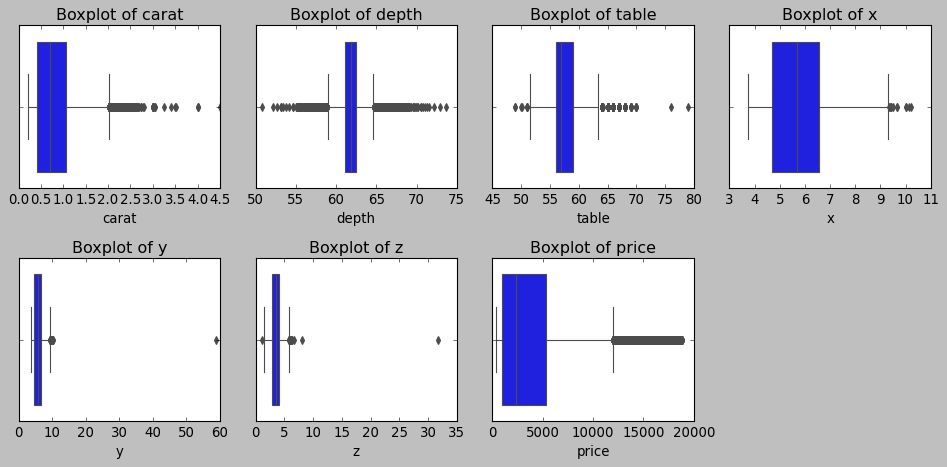

In [42]:
plt.figure(figsize = (12,6))
for i in range(len(numeric_colmns)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x = df[numeric_colmns[i]], data = df);
    plt.title('Boxplot of {}'.format(numeric_colmns[i]))
    plt.tight_layout();

In [43]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [44]:
for col in numeric_colmns:
    low, up = remove_outlier(df[col])
    df[col]=np.where(df[col]>up,up,df[col])
    df[col]=np.where(df[col]<low,low,df[col])

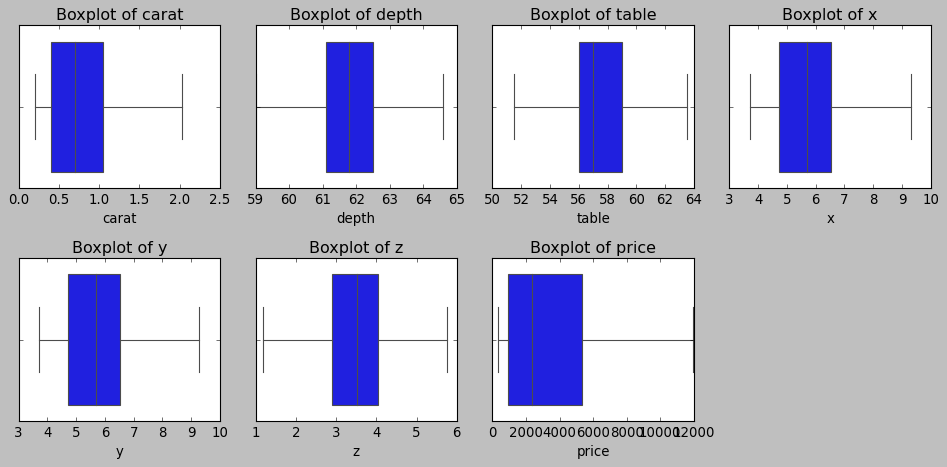

In [45]:
plt.figure(figsize = (12,6))
for i in range(len(numeric_colmns)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x = df[numeric_colmns[i]], data = df);
    plt.title('Boxplot of {}'.format(numeric_colmns[i]))
    plt.tight_layout();

In [46]:
X = df.drop('price', axis=1)
Y = df.pop('price')

In [47]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,2.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66
1,0.33,4.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70
2,0.90,3.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78
3,0.42,2.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96
4,0.31,2.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65


In [48]:
# Split X and Y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 , random_state=1)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, round(regression_model.coef_[idx],2)))

The coefficient for carat is 8868.13
The coefficient for cut is 84.52
The coefficient for color is 274.06
The coefficient for clarity is 444.02
The coefficient for depth is 16.59
The coefficient for table is -53.62
The coefficient for x is -1333.42
The coefficient for y is 1578.61
The coefficient for z is -1012.56


In [52]:
# Let us check the intercept for the model

intercept = round(regression_model.intercept_,2)

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1575.75


In [53]:
regression_model.score(X_train, y_train)

0.9309218819461851

In [54]:
regression_model.score(X_test, y_test)

0.9316589236369963

In [55]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,1.10,1.0,5.0,1.0,63.3,56.0,6.53,6.58,4.15,4065.0
12108,1.01,3.0,6.0,1.0,64.0,56.0,6.30,6.38,4.06,5166.0
20181,0.67,1.0,1.0,3.0,60.7,61.4,5.60,5.64,3.41,1708.0
4712,0.76,1.0,3.0,2.0,59.0,63.0,6.05,5.97,3.47,2447.0
2548,1.01,4.0,3.0,4.0,62.8,59.0,6.37,6.34,3.99,6618.0


In [56]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat + cut + color + clarity + depth + table + x + y + z', data = data_train).fit()
round(lm1.params,2)

Intercept   -1575.75
carat        8868.13
cut            84.52
color         274.06
clarity       444.02
depth          16.59
table         -53.62
x           -1333.42
y            1578.61
z           -1012.56
dtype: float64

In [57]:
print(lm1.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.821e+04
Date:                Sun, 08 May 2022   Prob (F-statistic):               0.00
Time:                        20:12:28   Log-Likelihood:            -1.5513e+05
No. Observations:               18847   AIC:                         3.103e+05
Df Residuals:                   18837   BIC:                         3.104e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1575.7510    751.285     -2.097      0.0

In [58]:
data_test = pd.concat([X_test, y_test], axis=1)

In [59]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'price ~ carat + cut + color + clarity + depth + table + x + y + z', data = data_test).fit()
round(lm2.params,2)

Intercept   -6098.42
carat        8659.39
cut            93.66
color         275.65
clarity       437.16
depth          76.53
table         -43.05
x            -798.06
y            1634.01
z           -1863.03
dtype: float64

In [60]:
print(lm2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.227e+04
Date:                Sun, 08 May 2022   Prob (F-statistic):               0.00
Time:                        20:12:28   Log-Likelihood:                -66496.
No. Observations:                8078   AIC:                         1.330e+05
Df Residuals:                    8068   BIC:                         1.331e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6098.4197   1271.224     -4.797      0.0

In [61]:
from sklearn import metrics

#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

908.9205430836379

In [62]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_test, y_test).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

909.4115586002895

In [63]:
type(y_test)

pandas.core.series.Series

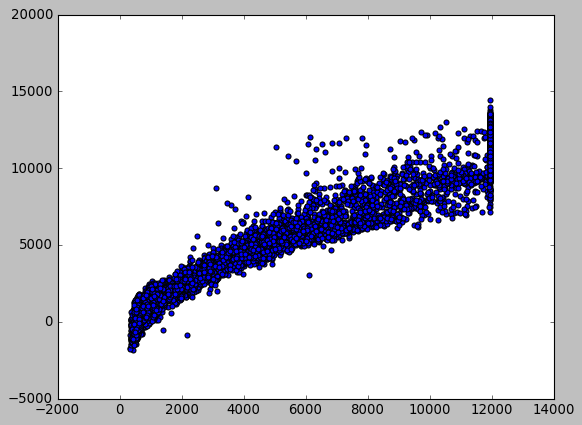

In [64]:
y_pred = regression_model.predict(X_test)
plt.scatter(y_test, y_pred)

In [65]:
y_train = y_train.to_frame().rename(columns = {0:'price'})
y_test = y_test.to_frame().rename(columns = {0:'price'})

In [66]:
## Iteration 2 -> by building model using the scaled data

from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)



In [67]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [68]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1792774395294003
The coefficient for cut is 0.025642813179381573
The coefficient for color is 0.13505471573013944
The coefficient for clarity is 0.2117093893404798
The coefficient for depth is 0.00584906144233303
The coefficient for table is -0.03343702016163367
The coefficient for x is -0.4322969052348233
The coefficient for y is 0.5082998118818353
The coefficient for z is -0.20287146402516384


In [69]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -6.5324469243187e-16


In [70]:
regression_model.score(X_test_scaled, y_test_scaled)

0.9316220219480532

In [71]:
regression_model.score(X_train_scaled, y_train_scaled)

0.9309218819461851

# Problem 2

In [72]:
df2 = pd.read_csv('Holiday_Package.csv')

In [73]:
df2.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [74]:
df2.drop('Unnamed: 0', axis=1,inplace=True)

In [75]:
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [76]:
df2.shape

(872, 7)

In [77]:
df2.dtypes

Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object

In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [79]:
dups = df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print('Before',df2.shape)



Number of duplicate rows = 0
Before (872, 7)


In [80]:
df2.drop_duplicates(inplace=True) 
print('After',df2.shape)

After (872, 7)


In [81]:
numeric_colmns = list(df2.select_dtypes(include=np.number).columns)
numeric_colmns

['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']

In [82]:
obj_colmns = [x for x in df2.columns if x not in numeric_colmns]
obj_colmns

['Holliday_Package', 'foreign']

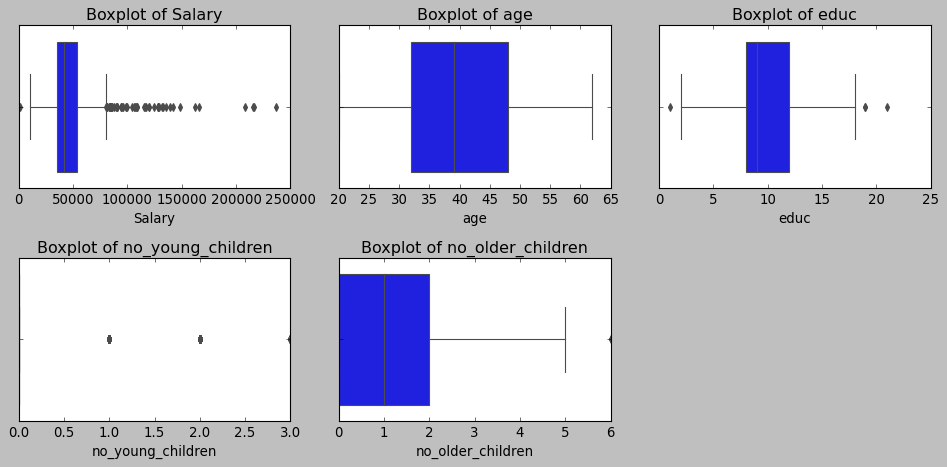

In [83]:
plt.figure(figsize = (12,6))
for i in range(len(numeric_colmns)):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x = df2[numeric_colmns[i]], data = df2);
    plt.title('Boxplot of {}'.format(numeric_colmns[i]))
    plt.tight_layout();

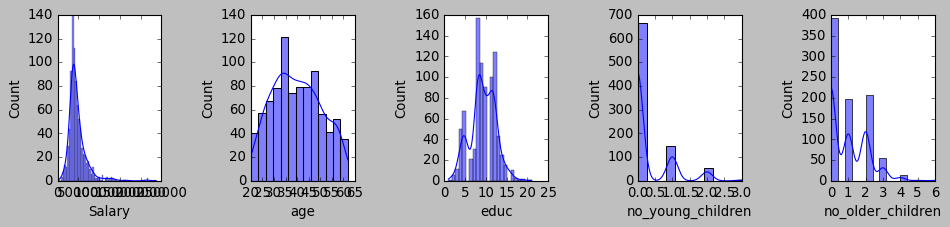

In [84]:
plt.figure(figsize = (12,3))
for i in range(len(numeric_colmns)):
    plt.subplot(1, 5, i + 1)
    sns.histplot(x = df2[numeric_colmns[i]], data = df2, kde=True);
    # plt.title('Histogram of {}'.format(numeric_colmns[i]))
    plt.tight_layout();

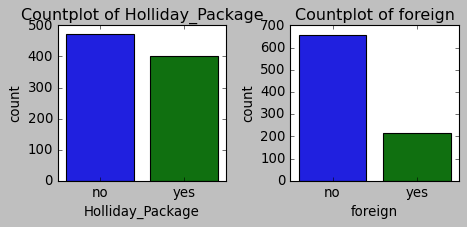

In [85]:
plt.figure(figsize = (6,3))
for i in range(len(obj_colmns)):
    plt.subplot(1, 2, i + 1)
    sns.countplot(x = df2[obj_colmns[i]], data = df2)
    plt.title('Countplot of {}'.format(obj_colmns[i]))
    plt.tight_layout()

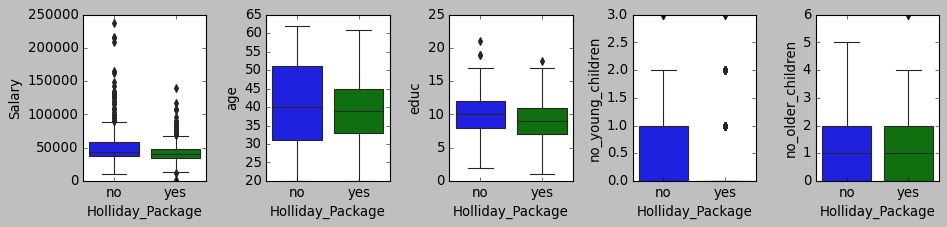

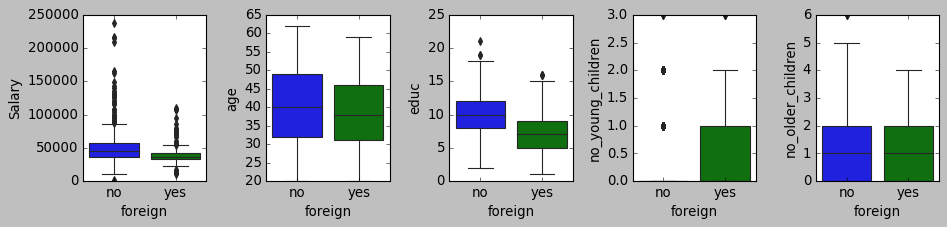

In [86]:
for o_col in obj_colmns:

    plt.figure(figsize = (12,3))
    for i in range(len(numeric_colmns)):
        plt.subplot(1, 5, i + 1)
        sns.boxplot(y = df2[numeric_colmns[i]], data = df2, x = o_col);
        # plt.title('Boxplot of {}'.format(numeric_colmns[i]))
        plt.tight_layout();

Text(0.5, 1.0, 'Bi-Variate Analysis of Holliday_Package & foreign')

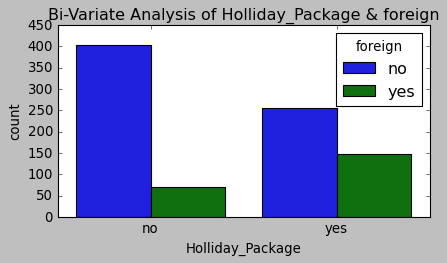

In [87]:
plt.figure(figsize = (6,3))
sns.countplot(data = df2, x = df2['Holliday_Package'], hue='foreign')
plt.title('Bi-Variate Analysis of Holliday_Package & foreign')

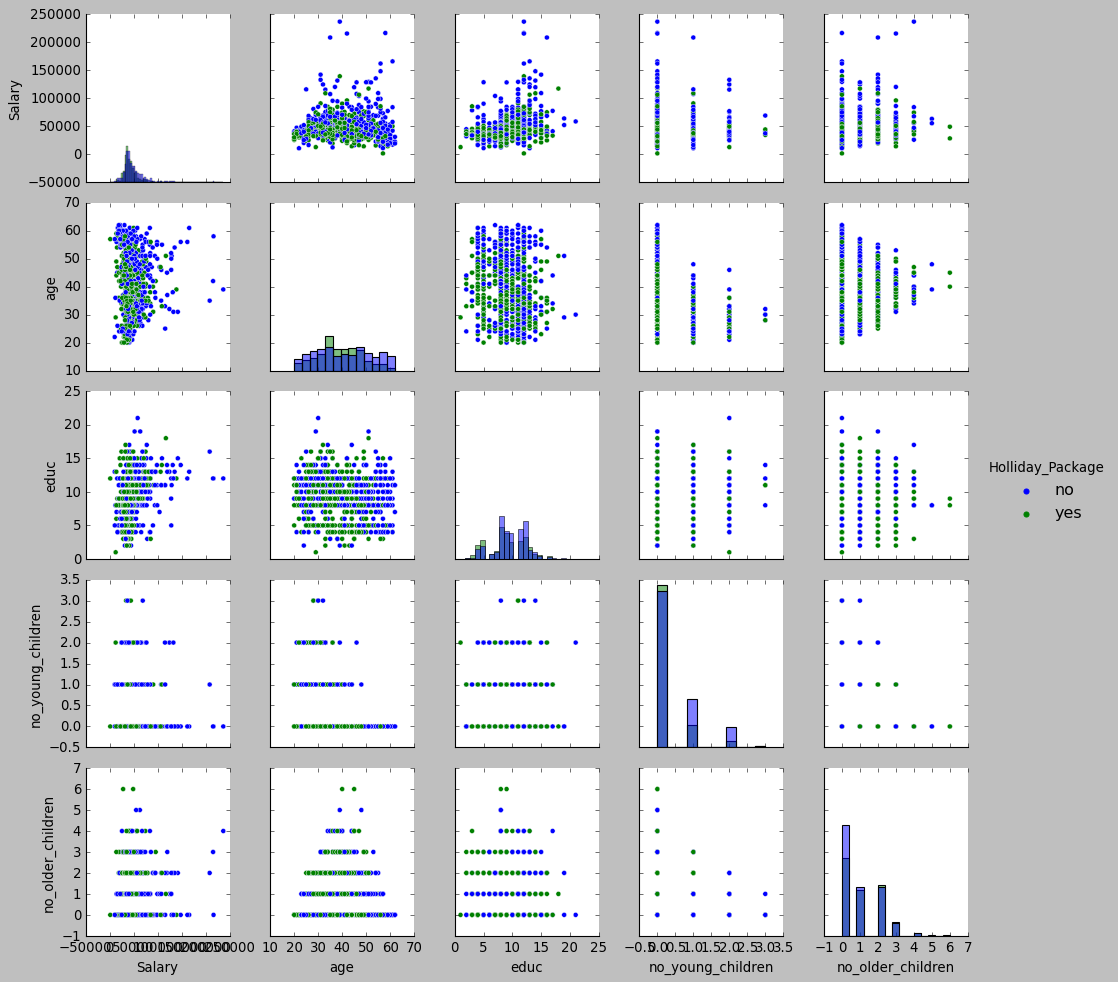

In [88]:
# plt.figure(figsize = (3,3))
sns.pairplot(data=df2, diag_kind='hist' ,hue='Holliday_Package')

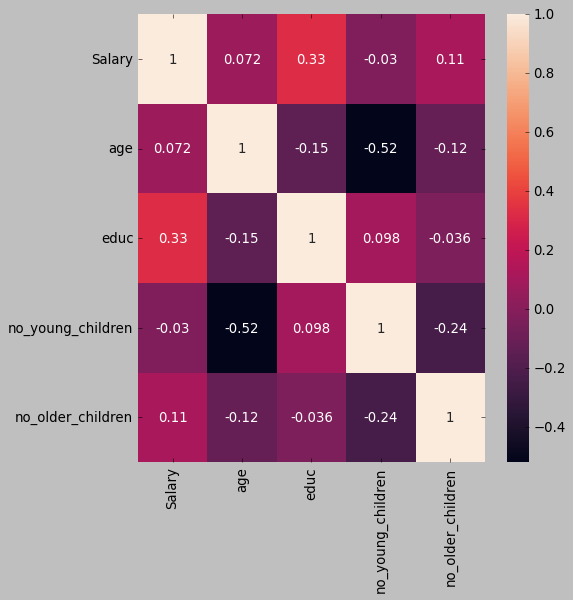

In [89]:
cor = df2.corr()
plt.figure(figsize=(7, 7))
sns.heatmap(cor,annot = True);

In [90]:
df2.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


### Q 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [91]:
print('Holliday Package\n',df2.Holliday_Package.value_counts())
print('\n')
print('color\n',df2.foreign.value_counts())
print('\n')

Holliday Package
 no     471
yes    401
Name: Holliday_Package, dtype: int64


color
 no     656
yes    216
Name: foreign, dtype: int64




In [92]:
df2['Holliday_Package']=np.where(df2['Holliday_Package'] =='yes', '1', df2['Holliday_Package'])
df2['Holliday_Package']=np.where(df2['Holliday_Package'] =='no', '0', df2['Holliday_Package'])

df2['foreign']=np.where(df2['foreign'] =='yes', '1', df2['foreign'])
df2['foreign']=np.where(df2['foreign'] =='no', '0', df2['foreign'])

In [93]:
print('Holliday Package\n',df2.Holliday_Package.value_counts())
print('\n')
print('foreign\n',df2.foreign.value_counts())
print('\n')

Holliday Package
 0    471
1    401
Name: Holliday_Package, dtype: int64


foreign
 0    656
1    216
Name: foreign, dtype: int64




In [94]:
df2['Holliday_Package'] = df2['Holliday_Package'].astype('int64')
df2['foreign'] = df2['foreign'].astype('int64')

In [95]:
df2.dtypes

Holliday_Package     int64
Salary               int64
age                  int64
educ                 int64
no_young_children    int64
no_older_children    int64
foreign              int64
dtype: object

In [96]:
X = df2.drop('Holliday_Package', axis=1)
y = df2.pop('Holliday_Package')

In [97]:
X.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412,30,8,1,1,0
1,37207,45,8,0,1,0
2,58022,46,9,0,0,0
3,66503,31,11,2,0,0
4,66734,44,12,0,2,0


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [101]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

In [102]:
X_train_s = scale(X_train)
X_test_s = scale(X_test)

In [103]:
y_train_s = np.asarray(y_train)
y_test_s = np.asarray(y_test)

In [104]:
clf = LinearDiscriminantAnalysis()
mod=clf.fit(X_train_s,y_train_s)
mod

LinearDiscriminantAnalysis()

### Q2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [105]:
# Logistic Regression Test Data
y_test_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)

print(model_score)
print("--------------------------------------------------")
print(metrics.confusion_matrix(y_test, y_test_predict))
print("--------------------------------------------------")
print(metrics.classification_report(y_test, y_test_predict))

0.5305343511450382
--------------------------------------------------
[[129  16]
 [107  10]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.89      0.68       145
           1       0.38      0.09      0.14       117

    accuracy                           0.53       262
   macro avg       0.47      0.49      0.41       262
weighted avg       0.47      0.53      0.44       262



In [106]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

AUC: 0.627


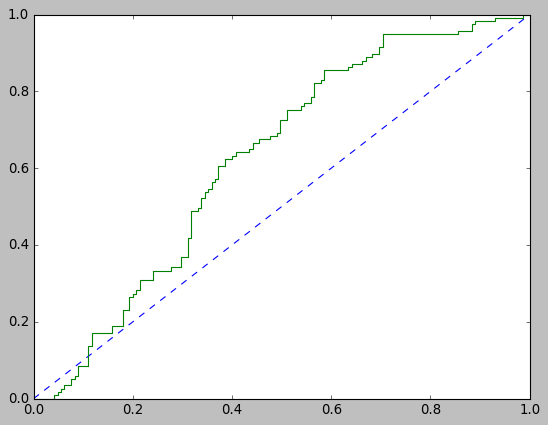

In [107]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [108]:
# Logistic Regression Train Data
y_train_predict = model.predict(X_train)
model_score = model.score(X_train, y_train)

print(model_score)
print("--------------------------------------------------")
print(metrics.confusion_matrix(y_train, y_train_predict))
print("--------------------------------------------------")
print(metrics.classification_report(y_train, y_train_predict))

0.519672131147541
--------------------------------------------------
[[294  32]
 [261  23]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.90      0.67       326
           1       0.42      0.08      0.14       284

    accuracy                           0.52       610
   macro avg       0.47      0.49      0.40       610
weighted avg       0.48      0.52      0.42       610



AUC: 0.567


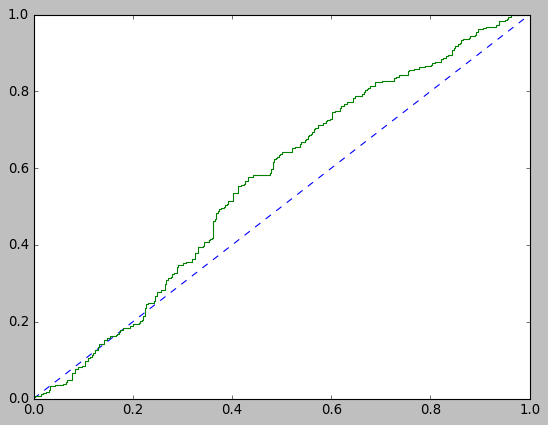

In [109]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [110]:
# LDA for training data 

y_train_pred = mod.predict(X_train_s)
model_score = mod.score(X_train_s, y_train_s)

print(model_score)
print("--------------------------------------------------")
print(metrics.confusion_matrix(y_train_s, y_train_pred))
print("--------------------------------------------------")
print(metrics.classification_report(y_train_s, y_train_pred))

0.6721311475409836
--------------------------------------------------
[[252  74]
 [126 158]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



AUC: 0.742


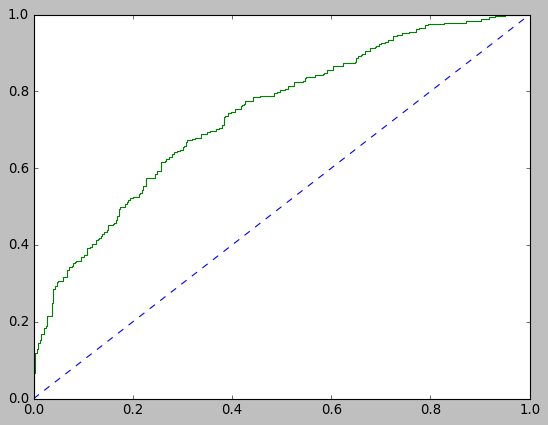

In [111]:
# predict probabilities
probs = mod.predict_proba(X_train_s)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_s, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_s, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [112]:
# LDA for testing data 

y_test_pred = mod.predict(X_test_s)
model_score = mod.score(X_test_s, y_test_s)

print(model_score)
print("--------------------------------------------------")
print(metrics.confusion_matrix(y_test_s, y_test_pred))
print("--------------------------------------------------")
print(metrics.classification_report(y_test_s, y_test_pred))

0.6450381679389313
--------------------------------------------------
[[104  41]
 [ 52  65]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.65       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.64      0.65      0.64       262



AUC: 0.742


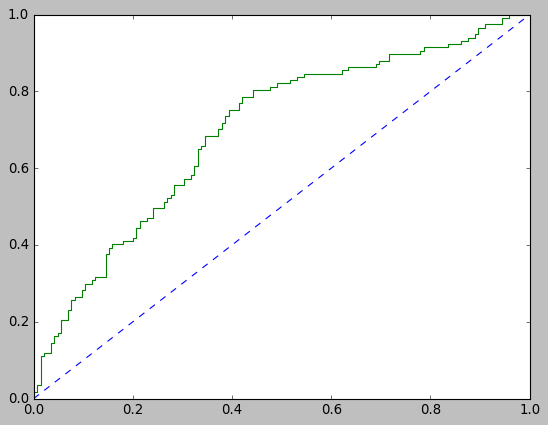

In [113]:
# predict probabilities
probs = mod.predict_proba(X_test_s)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test_s, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_s, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);